In [66]:
import numpy as np
from pandas import DataFrame as DF
from pandas import Series
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
from scipy.optimize import minimize

data_full = pandas.read_csv('train.csv', delimiter=',')

In [67]:
x = np.array(data_full)

In [68]:
data_full

,some_index,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100,dist
0,2000,5,5,1,1,5,4,7,8,10,...,69,70,77,69,64,68,74,74,43,0
1,2001,1,8,3,4,4,2,3,7,7,...,76,47,74,70,65,63,54,68,36,0
2,2002,0,0,0,0,1,1,0,3,2,...,49,63,55,64,48,69,50,44,32,0
3,2003,0,12,3,12,10,14,16,10,18,...,33,30,47,33,36,40,42,33,19,1
4,2004,0,2,3,4,4,5,4,2,10,...,74,75,69,84,77,91,99,98,47,0
5,2005,0,5,3,6,7,3,4,6,8,...,46,55,52,46,43,48,45,48,31,0
6,2006,0,2,9,6,12,6,6,14,18,...,40,37,33,44,46,45,41,43,19,1
7,2007,0,0,4,1,2,2,4,3,5,...,66,59,67,75,60,58,68,70,32,1
8,2008,0,0,0,0,0,0,1,1,2,...,51,59,45,56,52,63,53,46,22,0
9,2009,6,17,27,26,16,25,24,15,15,...,33,34,40,37,46,60,32,53,16,0


# Using simple SVM for groups

Problem: poor quality

In [69]:
k = 20
y = []
for s in range(0, 100/k):
    y.append(np.sum(x[:,(1 + s * k):(s + 1) * k + 2],axis=1))

In [113]:
X = np.array(y).T

In [114]:
y=x[:,-1]

IndexError: too many indices for array

In [63]:
y=x[:,-1]
skf = StratifiedKFold(y, n_folds = 5)
auc = []
for train_index, test_index in skf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y[train_index], y[test_index]
    C = svm.SVC()
    C.fit(X_train, y_train)
    y1 = C.decision_function(X_test)
    auc_c = roc_auc_score(y_test, y1)
    auc.append(auc_c)

In [64]:
auc

[0.5540674893903379,
 0.56234356853678913,
 0.56046150673482897,
 0.55291155177840723,
 0.56738302236983496]

# Using Maximum Likelihood

Problem: converges nowhere

In [65]:
M = 100
def LogL(n, q1, q2, a):
    x = np.linspace(q1, q2, 101)
    r = np.sum(n) * np.log(a) + (a - 1) * np.dot(n, np.log(x))
    return(r)
def grad(n, q1, q2, a):
    N = np.sum(n)
    x = np.linspace(q1, q2, 101)
    I = np.arange(0, 101)
    da = N / a + np.dot(n, np.log(x))
    dq1 = (a - 1) * np.dot(n, np.multiply(1./x, 1-I/100.))
    dq2 = (a - 1) * np.dot(n, np.multiply(I / 100. , 1./x))
    return(dq1, dq2, da)

In [67]:
n = x[3][1:102]
(q1, q2, a) = (0.3, 0.8, 0.88)

z = 1e-5

i = 0
while i <= 1000:
    val = LogL(n, q1, q2, a)
    print q1, q2, a, val
    (dq1, dq2, da) = grad(n, q1, q2, a)
    q1 += z * dq1
    q2 += z * dq2
    if q1 < 0:
        q1 = 0
    if q1 > 1:
        q1 = 1
    if q2 > 1:
        q2 = 1
    if q2 < 0:
        q2 = 0
    a += z * da
    i += 1

0.3 0.8 0.88 -182.423685729
0.296820000833 0.796692499688 0.897334540024 -151.142856996
0.294079969279 0.793847402449 0.913834538383 -123.105877604
0.291766088356 0.791448329514 0.92957850615 -97.8487574283
0.289865069274 0.789479796818 0.944637235987 -74.9717889301
0.288364085744 0.787927128554 0.959074951223 -54.1286249462
0.287250726862 0.786776389209 0.972950219029 -35.0176362721
0.286512964209 0.78601432952 0.986316684651 -17.3749792421
0.286139129744 0.785628342867 0.999223668414 -0.968965149776
0.286117901786 0.785606429455 1.01171665646 14.4045652271
0.286438296868 0.785937166215 1.02383770845 28.9260806753
0.287089665724 0.786609680877 1.03562579985 42.7555753748
0.288061691992 0.787613628983 1.04711711228 56.035284777
0.289344392506 0.788939172942 1.05834528247 68.8919957231
0.290928118293 0.790576962448 1.06934161766 81.4390235885
0.292803555599 0.792518115753 1.08013528398 93.7779133421
0.294961726446 0.794754201448 1.09075347258 105.999909486
0.297393988346 0.797277220521 

# Using Chi-square

In [252]:
def Chi(q, n = None):
    (q1, q2, a) = q
    l = n.shape[0]
    x = np.linspace(q1, q2, l)
    N = np.sum(n)

    p = a * x ** (a - 1)
    p = p / np.sum(p)

    n_p = p * N

    return np.dot((n - n_p) ** 2, 1. / n_p) + 10 / (q2 - q1) + 5 * (q2 - q1)

In [253]:
def get_chi_2(x):
    n = x[2:100]
    F = partial(Chi, n = n)
    #res = minimize(F, (0.1, 0.9, 1.1), bounds=bnds)
    
    res = minimize(F, (0.1, 0.9, 1.1), method='Nelder-Mead')
    
    print res
    
    return res['fun']

In [254]:
ans = []
i = 0
for n in x:
    ans.append(get_chi_2(n))
    print(i)
    i += 1

 final_simplex: (array([[ 0.85040343,  2.26463195,  4.04615668],
       [ 0.85037999,  2.264623  ,  4.04608073],
       [ 0.85039643,  2.26456833,  4.04619999],
       [ 0.85045963,  2.26472233,  4.04619969]]), array([ 104.90970519,  104.9097052 ,  104.9097052 ,  104.90970525]))
           fun: 104.90970519433041
       message: 'Optimization terminated successfully.'
          nfev: 306
           nit: 170
        status: 0
       success: True
             x: array([ 0.85040343,  2.26463195,  4.04615668])
0
 final_simplex: (array([[ 0.59870606,  2.01290981,  3.25028795],
       [ 0.59872833,  2.01297067,  3.25029525],
       [ 0.59873482,  2.01298644,  3.25030313],
       [ 0.59870363,  2.01293576,  3.2502575 ]]), array([ 119.60520404,  119.60520404,  119.60520404,  119.60520404]))
           fun: 119.60520403560857
       message: 'Optimization terminated successfully.'
          nfev: 263
           nit: 150
        status: 0
       success: True
             x: array([ 0.59870606,

KeyboardInterrupt: 

In [256]:
roc_auc_score(x[0:i, -1], -np.array(ans))

0.60738347946469773

In [231]:
ans

[90.767569565005616,
 105.46306841819674,
 113.16337967713848,
 99.404206985769235,
 94.353654893338643,
 94.593192528103074,
 68.673287843355098,
 106.81335153866934,
 117.19164764488201,
 105.63926880515348,
 101.00047099451628,
 102.07326757653726,
 73.139622515055606,
 78.85597283002447,
 92.80623872764896,
 142.65275802931043,
 89.183097471633303,
 74.035174613390893,
 100.22929032578281,
 104.84250507356637,
 96.916916509065786,
 106.33567855235519,
 97.861835436792433,
 93.474888012025659,
 88.835659648730257,
 125.4443991584763,
 81.687858785964153,
 138.42834339368449,
 88.71715457195296,
 102.02269933420705,
 77.388163071108934,
 113.816003213264,
 101.2731368654233,
 82.430212555748369,
 77.048497933219423,
 111.74122976027149,
 100.55509136559778,
 86.161611878954716,
 86.94848263589148,
 124.14323820335872,
 109.27384137218087,
 92.625633854947921,
 140.61356707817032,
 94.748812060194339,
 91.070894184575465,
 106.91818024273016,
 95.460732889735368,
 103.16434948351429,


In [223]:
res

 final_simplex: (array([[  6.37403087e-10,   2.68313953e+00,   2.10756939e+00],
       [  8.62634073e-10,   2.68307013e+00,   2.10757618e+00],
       [  2.33249203e-09,   2.68323208e+00,   2.10755213e+00],
       [  4.18697235e-09,   2.68316159e+00,   2.10756250e+00]]), array([ 113.16334825,  113.16334833,  113.16334855,  113.16334867]))
           fun: 113.16334824705211
       message: 'Optimization terminated successfully.'
          nfev: 244
           nit: 134
        status: 0
       success: True
             x: array([  6.37403087e-10,   2.68313953e+00,   2.10756939e+00])

In [270]:
np.where(x[x[:, -1] == 1, 1:]>0)

(array([   0,    0,    0, ..., 1764, 1764, 1764]),
 array([  1,   2,   3, ...,  99, 100, 101]))

In [275]:
np.argmin(x[x[:, -1] == 1, 1:], axis=1)

array([  0,   0,   0, ...,   0,   0, 101])

array([  6,   7,  10,  13,  24,  32,  33,  43,  46,  48,  51,  61,  64,
        70,  73,  75,  78,  85,  89,  91,  98, 101, 108, 118, 129, 148,
       154, 155, 156, 161, 162, 164, 165, 166, 173, 174, 181, 193, 199,
       200, 203, 204, 212, 216, 219, 220, 224, 234, 237])

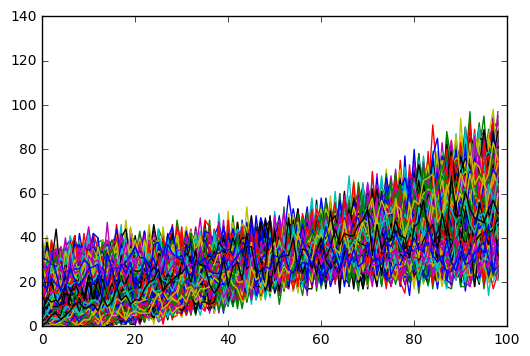

In [10]:
def plot_i(i):
    plt.plot(x[i, 2:101])
ones = np.where(x[:, -1] == 1)[0]
plt.ylim((0, 140))
for i in ones:
    plot_i(i)

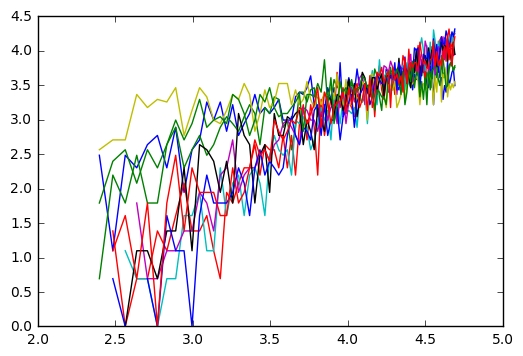

In [122]:
def plot_i(i):
    plt.plot(x[i, 2:101])
ones = np.where(x[:, -1] == 1)[0][0:10]
for i in ones:
    plt.plot(np.log(np.arange(11, 110)), np.log(x[i, 2:101]))

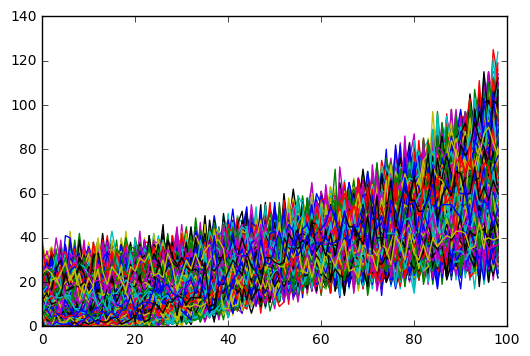

In [11]:
zeros = np.where(x[:, -1] == 0)[0]
for i in zeros:
    plot_i(i)

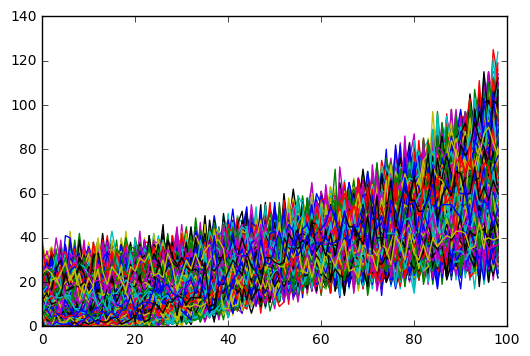

# Using Poly

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_auc_score, roc_curve

def get_x(T):
    x = np.arange(0, T) / (1. * T)
    return x

def plot_segment(seg, coeff):
    p = np.poly1d(coeff)
    x = get_x(len(seg))
    y = seg
    xp = np.linspace(0, 1, 100)
    plt.plot(x, y, '.', label = 'Data')
    plt.plot(xp, p(xp), '-', label = 'Poly')
def get_poly_coeffs(X, deg):
    t = np.linspace(0, 1, X.shape[1])
    ans = []
    for r in X:
        ans.append(np.polyfit(t, r, deg))
    return(np.array(ans))

In [71]:
y=x[:,-1]

In [77]:
def get_auc_deg(x, y, deg):
    X = get_poly_coeffs(x, deg)
    plot_segment(x[0], X[0])
    y = y[0:X.shape[0]]
    skf = StratifiedKFold(y, n_folds = 5, random_state = 42)
    auc = []
    for train_index, test_index in skf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]

        y_train, y_test = y[train_index], y[test_index]
        C = svm.SVC()
        C.fit(X_train, y_train)
        y1 = C.decision_function(X_test)
        auc_c = roc_auc_score(y_test, y1)
        fpr, tpr, q = roc_curve(y_test, y1)
        auc.append(auc_c)
    auc = np.array(auc)
    return (auc.mean(), auc.std(),fpr,tpr)

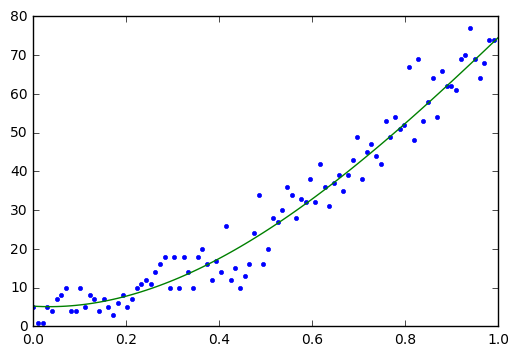

In [78]:
res=get_auc_deg(x[:,2:101],y,3)

# AUC curve

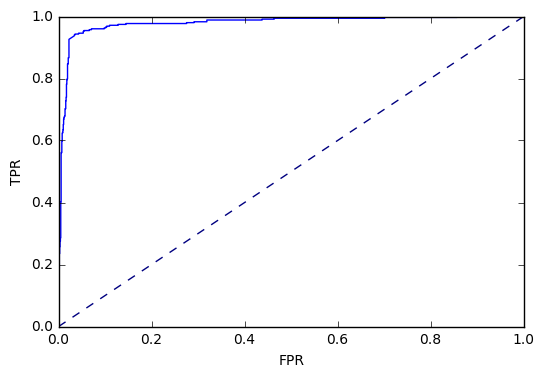

In [85]:
plt.plot(res[2],res[3],label='AUC')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

(1, (0.64788707629188236, 0.013813599913463865))
(2, (0.95670650038531257, 0.0057915260068109806))
(3, (0.97376510045260667, 0.0040215772911752325))
(4, (0.78845929254447367, 0.011542552854513695))
(5, (0.50540067076943118, 0.0020024009545392008))


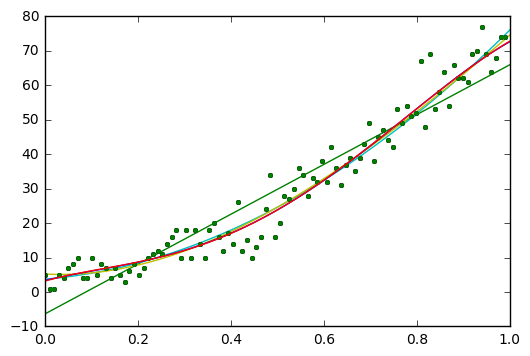

In [73]:
for deg in [1,2,3,4,5]:
    print (deg, get_auc_deg(x[:, 2:101], y, deg))

In [67]:
print ('a',('b','b'))

('a', ('b', 'b'))


In [13]:
def train(x, y, deg):
    X = get_poly_coeffs(x, deg)
    plot_segment(x[0], X[0])
    y = y[0:X.shape[0]]
    C = svm.SVC()
    C.fit(X, y)
    return(C)

ValueError: The number of classes has to be greater than one; got 1

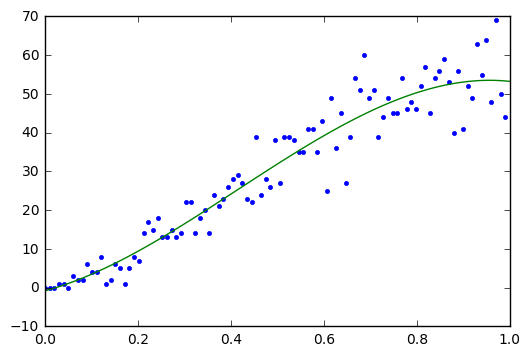

In [23]:
C = train(x[2:3, 2:101], y, 3)

In [102]:
X = get_poly_coeffs(x[:, 2:101], 2)
y1 = C.decision_function(X)
auc_c = roc_auc_score(y, y1)

In [103]:
auc_c

0.99046300456948111

# Test data

In [86]:
data_full_t = pandas.read_csv('test.csv', delimiter=',')
x_t = np.array(data_full_t)

In [87]:
data_full_t

,some_index,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,2,0,1,2,1,2,3,3,2,...,85,87,99,73,93,99,95,88,94,39
1,1,0,4,9,5,11,10,13,9,12,...,40,37,46,44,39,47,37,47,48,33
2,2,0,1,0,0,1,0,1,2,1,...,50,50,63,55,71,43,64,59,70,33
3,3,3,9,8,7,6,8,6,5,5,...,76,72,63,64,64,65,58,68,70,37
4,4,11,16,16,15,28,28,22,26,26,...,38,46,26,43,38,37,19,29,32,19
5,5,0,0,0,0,0,0,0,0,0,...,64,59,66,53,71,57,66,56,72,34
6,6,13,25,29,24,35,21,24,26,28,...,29,36,32,27,34,25,24,38,34,14
7,7,4,8,13,6,14,13,7,9,14,...,55,53,41,53,52,51,53,42,49,22
8,8,1,3,5,2,6,8,6,2,11,...,39,44,49,36,42,49,36,52,33,26
9,9,0,0,0,0,2,1,2,4,3,...,60,56,60,67,68,48,62,76,58,31


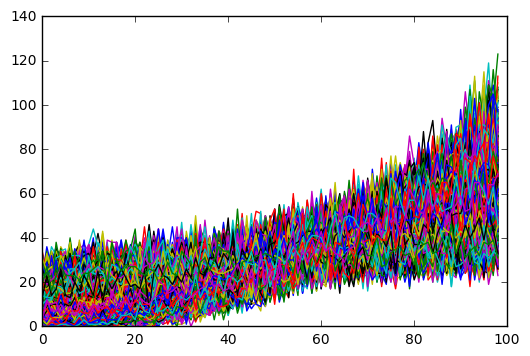

In [89]:
for i in range(x_t.shape[0]):
    plt.plot(x_t[i, 2:101])

In [104]:
X_t = get_poly_coeffs(x_t[:, 2:101], 2)
y_t = C.decision_function(X_t)

In [105]:
res = DF()
res['some_index'] = x_t[:, 0]
res['dist'] = y_t

In [106]:
res

,some_index,dist
0,0,-0.714541
1,1,0.666635
2,2,-0.999181
3,3,-1.000784
4,4,1.064527
5,5,-1.017614
6,6,0.238594
7,7,-1.000051
8,8,-1.003957
9,9,1.038264


In [107]:
res.to_csv('ans2.csv', delimeter=',', index=False)

In [181]:
i = 2
def err((t1, t2)):
    if t1 < 0 or t2 < 0 or t1 > t2:
        return 1e10
    t = np.log(np.linspace(t1, t2, 99))
    y = np.log(x[i, 2:101])
    p = np.polyfit(t, y, 1)
    z = np.poly1d(p)
    err = np.sum((z(t)-y) ** 2)
    print t1, t2, e
    plt.plot(t, z(t))
    #plt.plot(t, y)
    return err

2.0 10.0
2.1 10.0
2.0 10.5
2.1 9.5
2.025 10.25
2.05 10.0
2.0 10.25
2.05 9.75
2.0125 10.125
2.025 10.0
2.0 10.125
2.025 9.875
2.00625 10.0625
2.0125 10.0
2.0 10.0625
2.0125 9.9375
2.003125 10.03125
2.00625 10.0
2.0 10.03125
2.00625 9.96875
2.0015625 10.015625
2.003125 10.0
2.0 10.015625
2.003125 9.984375
2.00078125 10.0078125
2.0015625 10.0
2.0 10.0078125
2.0015625 9.9921875
2.000390625 10.00390625
2.00078125 10.0
2.0 10.00390625
2.00078125 9.99609375
2.0001953125 10.001953125
2.000390625 10.0
2.0 10.001953125
2.000390625 9.998046875
2.00009765625 10.0009765625
2.0001953125 10.0
2.0 10.0009765625
2.0001953125 9.9990234375
2.00004882813 10.0004882812
2.00009765625 10.0
2.0 10.0004882812
2.00009765625 9.99951171875
2.00002441406 10.0002441406
2.00004882813 10.0
2.0 10.0002441406
2.00004882813 9.99975585938
2.00001220703 10.0001220703
2.00002441406 10.0
2.0 10.0001220703
2.00002441406 9.99987792969
2.00000610352 10.0000610352
2.00001220703 10.0
2.0 10.0000610352
2.00001220703 9.99993896484

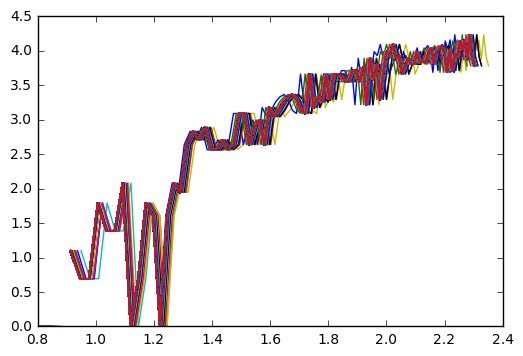

In [182]:
bnds = ((0.1, None), (0.1, None))
res = minimize(err, (2, 10), method = 'Nelder-Mead', bounds = bnds, )
[t1, t2] = res['x']
t = t = np.log(np.linspace(t1, t2, 99))
y = np.log(x[i, 2:101])
p = np.polyfit(t, y, 1)
z = np.poly1d(p)
plt.plot(t, z(t))
plt.plot(t, y)
print res['fun']

In [174]:
i

2

In [183]:
res

 final_simplex: (array([[  2.,  10.],
       [  2.,  10.],
       [  2.,  10.]]), array([ nan,  nan,  nan]))
           fun: nan
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 403
           nit: 101
        status: 1
       success: False
             x: array([  2.,  10.])

# $AUC(n)$

In [26]:
data="(1, (0.64788707629188236, 0.013813599913463865))\n\
(2, (0.95670650038531257, 0.0057915260068109806))\n\
(3, (0.97376510045260667, 0.0040215772911752325))\n\
(4, (0.78845929254447367, 0.011542552854513695))\n\
(5, (0.50540067076943118, 0.0020024009545392008))"

In [47]:
t = []

for s in data.split("\n"):
    a = []
    y = s.split(',')
    y[0] = y[0][1:]
    y[1] = y[1][2:]
    y[2] = y[2][1:-2]
    a = [int(y[0]),float(y[1]),float(y[2])]
    t.append(np.array(a))
    print a
t = np.array(t)

[1, 0.6478870762918824, 0.013813599913463865]
[2, 0.9567065003853126, 0.0057915260068109806]
[3, 0.9737651004526067, 0.0040215772911752325]
[4, 0.7884592925444737, 0.011542552854513695]
[5, 0.5054006707694312, 0.002002400954539201]


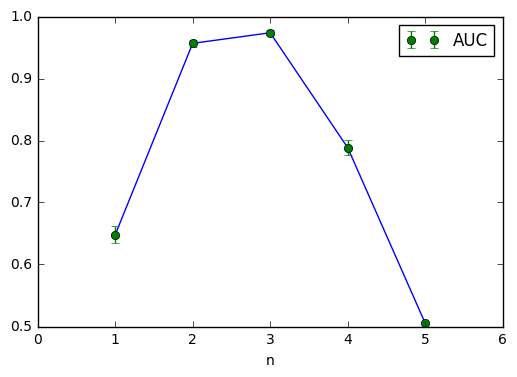

In [59]:
plt.plot(t[:,0],t[:,1])
plt.errorbar(t[:,0],t[:,1],yerr=t[:,2], fmt='o',label='AUC')
plt.xticks(np.arange(0, 7, 1))
plt.legend()
plt.xlabel('n')